# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (you could download the notebook with File -> Download .ipynb, open the notebook locally, and then File -> Download as -> PDF via LaTeX), and then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [3]:
import tensorflow as tf
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images.

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

The train and test datasets required for this project can be downloaded from [here](http://ufldl.stanford.edu/housenumbers/train.tar.gz) and [here](http://ufldl.stanford.edu/housenumbers/test.tar.gz). Once unzipped, you will have two files: `train_32x32.mat` and `test_32x32.mat`. You should store these files in Drive for use in this Colab notebook.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [12]:
# Run this cell to connect to your Drive folder

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
# Load the dataset from your Drive folder
! ls
train = loadmat('gdrive/MyDrive/train_32x32.mat')
test = loadmat('gdrive/MyDrive/test_32x32.mat')

gdrive	sample_data


# Νέα ενότητα

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [15]:
# print(train.keys())
train_data = train['X']
train_targets = train['y']
test_data = test['X']
test_targets = test['y']

train_data = train_data / 255
test_data = test_data / 255

print(train_data.shape)
print(train_targets.shape)

(32, 32, 3, 73257)
(73257, 1)


In [16]:
# Changing label = 10, to label = 0.
train_targets[train_targets == 10] = 0
test_targets[test_targets == 10] = 0

print(train_targets.shape)
print(test_targets.shape)

(73257, 1)
(26032, 1)


Random sample:  [10353 55183 26112  3321 18176 48472 27300 15118 35382 14264]


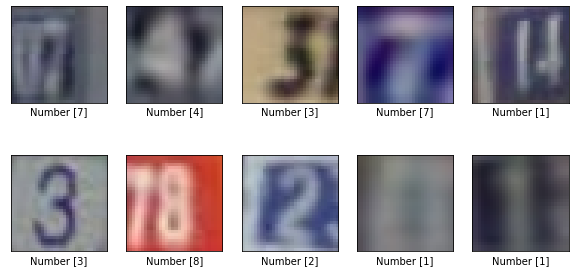

In [17]:
random_sample = np.random.choice(train_data.shape[3], 10)
print("Random sample: ", random_sample)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, value in enumerate(random_sample):
    axes[i // 5, i % 5].imshow(train_data[..., value])
    axes[i // 5, i % 5].set_xticks([])
    axes[i // 5, i % 5].set_yticks([])
    axes[i // 5, i % 5].set_xlabel(f"Number {train_targets[value]}")

In [18]:
# Averaging 3 channels to one

R, G, B = train_data[:, :, 0, :], train_data[:, :, 1, :], train_data[:, :, 2, :]
R_t, G_t, B_t = test_data[:, :, 0, :], test_data[:, :, 1, :], test_data[:, :, 2, :]

new_train_data = (R + G + B) / 3
new_test_data = (R_t + G_t + B_t) / 3
# new_train_data = 0.299 * R + 0.587 * G + 0.114 * B


# Adding dummy axis
train_data = new_train_data[:, :, np.newaxis, :]
test_data = new_test_data[:, :, np.newaxis, :]

print(train_data.shape)
print(test_data.shape)


(32, 32, 1, 73257)
(32, 32, 1, 26032)


Random sample for grayscale images:  [ 6148 52241 34312 26233 15632  2282  1214  9550 51114 53168]


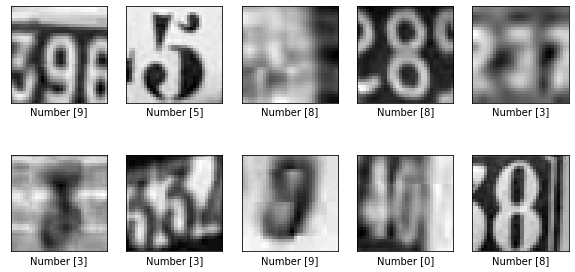

In [19]:
# Train images
random_sample = np.random.choice(train_data.shape[3], 10)
print("Random sample for grayscale images: ", random_sample)


# plt.imshow(new_train_data[..., 0][:, :, 0])
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, value in enumerate(random_sample):
    axes[i // 5, i % 5].imshow(train_data[:, :, 0, value], cmap = plt.get_cmap(name = 'gray'))
    axes[i // 5, i % 5].set_xticks([])
    axes[i // 5, i % 5].set_yticks([])
    axes[i // 5, i % 5].set_xlabel(f"Number {train_targets[value]}")

Random sample for grayscale images:  [ 3410   217  1360 12340  6747 16774 24428 16533  8770  3716]


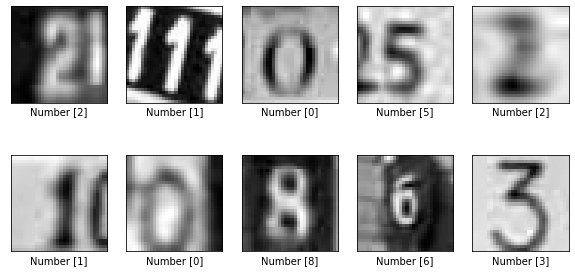

In [20]:
# TEST images
random_sample = np.random.choice(test_data.shape[3], 10)
print("Random sample for grayscale images: ", random_sample)


# plt.imshow(new_train_data[..., 0][:, :, 0])
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, value in enumerate(random_sample):
    axes[i // 5, i % 5].imshow(test_data[:, :, 0, value], cmap = plt.get_cmap(name = 'gray'))
    axes[i // 5, i % 5].set_xticks([])
    axes[i // 5, i % 5].set_yticks([])
    axes[i // 5, i % 5].set_xlabel(f"Number {test_targets[value]}")

In [21]:
# Transposing to get the number of samples at first dimensions
train_data = np.transpose(train_data, (3, 0, 1, 2))
test_data = np.transpose(test_data, (3, 0, 1, 2))

print(train_data.shape)
print(train_data.shape)

(73257, 32, 32, 1)
(73257, 32, 32, 1)


## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D

In [55]:
def get_model(input_shape):
    
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu', kernel_initializer=tf.keras.initializers.he_uniform),
        Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_uniform),
        Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.he_uniform),
        Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.he_uniform),
        Dense(10, activation='softmax')

    ])
    return model


def compile_model(model, lr):
    if lr:
      opt = tf.keras.optimizers.Adam(learning_rate=lr)
    else:
      opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

def early_stopping_callback(patience_):
    early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=patience_)
    
    return early_stopping

def checkpoint_callback():
    checkpoint_path = "mlp_model/checkpoint"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                 save_weights_only=False,
                                 save_best_only=True,
                                 monitor='val_accuracy',
                                 mode='max',
                                 save_freq='epoch',
                                 verbose=1)
    return checkpoint
                                 

In [57]:
model = get_model(train_data[0].shape)
compile_model(model, lr=None)



In [58]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_61 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_64 (Dense)             (None, 10)                650       
Total params: 697,930
Trainable params: 697,930
Non-trainable params: 0
_______________________________________________

In [59]:
earlystopping = early_stopping_callback(patience_=5)
checkpoint = checkpoint_callback()
EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(train_data, train_targets, epochs=EPOCHS,
                    validation_split=0.15, batch_size=BATCH_SIZE,
                    verbose=1, use_multiprocessing=True,
                    shuffle=True,
                    callbacks=[earlystopping, checkpoint])

Epoch 1/30
973/973 [==============================] - 4s 3ms/step - loss: 2.0595 - accuracy: 0.2588 - val_loss: 1.6451 - val_accuracy: 0.4217

Epoch 00001: val_accuracy improved from -inf to 0.42169, saving model to mlp_model/checkpoint
INFO:tensorflow:Assets written to: mlp_model/checkpoint/assets
Epoch 2/30
973/973 [==============================] - 3s 3ms/step - loss: 1.4156 - accuracy: 0.5225 - val_loss: 1.2448 - val_accuracy: 0.5999

Epoch 00002: val_accuracy improved from 0.42169 to 0.59987, saving model to mlp_model/checkpoint
INFO:tensorflow:Assets written to: mlp_model/checkpoint/assets
Epoch 3/30
973/973 [==============================] - 4s 4ms/step - loss: 1.1882 - accuracy: 0.6164 - val_loss: 1.1234 - val_accuracy: 0.6390

Epoch 00003: val_accuracy improved from 0.59987 to 0.63900, saving model to mlp_model/checkpoint
INFO:tensorflow:Assets written to: mlp_model/checkpoint/assets
Epoch 4/30
973/973 [==============================] - 3s 3ms/step - loss: 1.0837 - accuracy: 0

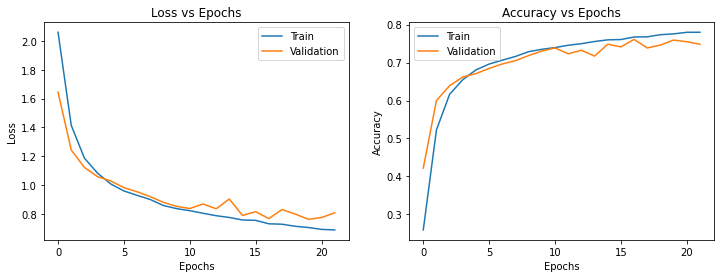

In [60]:
loss = history.history['loss']
acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(history.history['loss']))
fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, loss, label="Train")
ax.plot(epochs, val_loss, label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, acc, label="Train")
ax.plot(epochs, val_acc, label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

In [62]:
test_loss, test_acc = model.evaluate(test_data, test_targets, verbose=1, 
                                    batch_size=BATCH_SIZE)

print(f"Loss on test data: {test_loss}")
print(f"Accuracy on test data: {test_acc}")

407/407 [==============================] - 1s 2ms/step - loss: 0.9147 - accuracy: 0.7192
Loss on test data: 0.9146577715873718
Accuracy on test data: 0.7191533446311951


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [89]:
def get_CNN_model(input_shape, drop_rate, reg_rate):
    
    model = Sequential([
        Conv2D(64, (3, 3), padding='SAME', input_shape=input_shape, activation='relu', 
               kernel_initializer=tf.keras.initializers.he_uniform, 
               kernel_regularizer=tf.keras.regularizers.l2(reg_rate), name='block1_conv_1'),
        MaxPooling2D((2, 2), padding='SAME', name='block1_pool_1'),
        BatchNormalization(),
        Conv2D(64, (3, 3), padding='SAME', input_shape=input_shape, activation='relu', 
               kernel_initializer=tf.keras.initializers.he_uniform, 
               kernel_regularizer=tf.keras.regularizers.l2(reg_rate), name='block2_conv_1'),
        MaxPooling2D((2, 2), padding='SAME', name='block2_pool_1'),
        BatchNormalization(),
        Conv2D(32, (3, 3), padding='SAME', input_shape=input_shape, activation='relu', 
               kernel_initializer=tf.keras.initializers.he_uniform, 
               kernel_regularizer=tf.keras.regularizers.l2(reg_rate), name='block3_conv_1'),
        Conv2D(32, (3, 3), padding='SAME', input_shape=input_shape, activation='relu', 
               kernel_initializer=tf.keras.initializers.he_uniform, 
               kernel_regularizer=tf.keras.regularizers.l2(reg_rate), name='block3_conv_2'),
        MaxPooling2D((2, 2), padding='SAME', name='block3_pool_1'),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(reg_rate),
               kernel_initializer=tf.keras.initializers.he_uniform),
        Dropout(drop_rate),
        Dense(64, activation='relu', 
               kernel_regularizer=tf.keras.regularizers.l2(reg_rate),
               kernel_initializer=tf.keras.initializers.he_uniform),        
        Dropout(drop_rate),
        Dense(64, activation='relu', 
             kernel_regularizer=tf.keras.regularizers.l2(reg_rate),
              kernel_initializer=tf.keras.initializers.he_uniform),
        Dense(10, activation='softmax')

    ])
    return model


def compile_CNN_model(model, lr):
    if lr:
      opt = tf.keras.optimizers.Adam(learning_rate=lr)
    else:
      opt = tf.keras.optimizers.Adam()
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

def early_stopping_callback_CNN(patience_):
    early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=patience_)
    
    return early_stopping

def checkpoint_callback_CNN():
    checkpoint_path = "cnn_model/checkpoint"
    checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                 save_weights_only=False,
                                 save_best_only=True,
                                 monitor='val_accuracy',
                                 mode='max',
                                 save_freq='epoch',
                                 verbose=1)
    return checkpoint

In [90]:
model_cnn = get_CNN_model(train_data[0].shape, drop_rate=0.3, reg_rate=1e-8)
compile_CNN_model(model_cnn, lr=None)
model_cnn.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv_1 (Conv2D)       (None, 32, 32, 64)        640       
_________________________________________________________________
block1_pool_1 (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
block2_conv_1 (Conv2D)       (None, 16, 16, 64)        36928     
_________________________________________________________________
block2_pool_1 (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
block3_conv_1 (Conv2D)       (None, 8, 8, 32)        

In [91]:
earlystopping_cnn = early_stopping_callback_CNN(patience_=3)
checkpoint_cnn = checkpoint_callback_CNN()
EPOCHS = 30
BATCH_SIZE = 64

history_cnn = model_cnn.fit(train_data, train_targets, epochs=EPOCHS,
                            validation_split=0.15, batch_size=BATCH_SIZE,
                            verbose=1, use_multiprocessing=True,
                            shuffle=True,
                            callbacks=[earlystopping_cnn, checkpoint_cnn])

Epoch 1/30
973/973 [==============================] - 8s 7ms/step - loss: 1.2804 - accuracy: 0.5641 - val_loss: 0.5843 - val_accuracy: 0.8165

Epoch 00001: val_accuracy improved from -inf to 0.81645, saving model to cnn_model/checkpoint
INFO:tensorflow:Assets written to: cnn_model/checkpoint/assets
Epoch 2/30
973/973 [==============================] - 7s 7ms/step - loss: 0.5349 - accuracy: 0.8412 - val_loss: 0.4138 - val_accuracy: 0.8757

Epoch 00002: val_accuracy improved from 0.81645 to 0.87569, saving model to cnn_model/checkpoint
INFO:tensorflow:Assets written to: cnn_model/checkpoint/assets
Epoch 3/30
973/973 [==============================] - 7s 7ms/step - loss: 0.4280 - accuracy: 0.8756 - val_loss: 0.3598 - val_accuracy: 0.8933

Epoch 00003: val_accuracy improved from 0.87569 to 0.89326, saving model to cnn_model/checkpoint
INFO:tensorflow:Assets written to: cnn_model/checkpoint/assets
Epoch 4/30
973/973 [==============================] - 7s 7ms/step - loss: 0.3758 - accuracy: 0

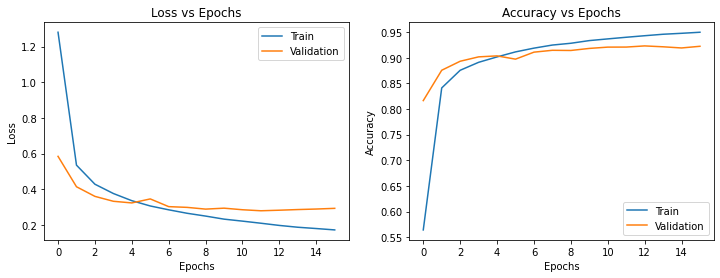

In [92]:
loss = history_cnn.history['loss']
acc = history_cnn.history['accuracy']

val_loss = history_cnn.history['val_loss']
val_acc = history_cnn.history['val_accuracy']

epochs = range(len(history_cnn.history['loss']))
fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, loss, label="Train")
ax.plot(epochs, val_loss, label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, acc, label="Train")
ax.plot(epochs, val_acc, label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Epochs")
ax.legend()

In [93]:
test_loss, test_acc = model_cnn.evaluate(test_data, test_targets, verbose=1, 
                                         batch_size=BATCH_SIZE)

print(f"Loss on test data: {test_loss}")
print(f"Accuracy on test data: {test_acc}")

407/407 [==============================] - 2s 4ms/step - loss: 0.3082 - accuracy: 0.9177
Loss on test data: 0.30822423100471497
Accuracy on test data: 0.9177166819572449


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [98]:
model_mlp = get_model(input_shape=train_data[0].shape)
model_mlp.load_weights('mlp_model/checkpoint')
model_mlp.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_108 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_109 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_110 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_111 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_112 (Dense)            (None, 10)                650       
Total params: 697,930
Trainable params: 697,930
Non-trainable params: 0
_______________________________________________

In [96]:
model_cnn = tf.keras.models.load_model('cnn_model/checkpoint')
model_cnn.load_weights('cnn_model/checkpoint')
model_cnn.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv_1 (Conv2D)       (None, 32, 32, 64)        640       
_________________________________________________________________
block1_pool_1 (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
block2_conv_1 (Conv2D)       (None, 16, 16, 64)        36928     
_________________________________________________________________
block2_pool_1 (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
block3_conv_1 (Conv2D)       (None, 8, 8, 32)        

Random sample for grayscale images:  [13510  9910  1543 16048 25723]


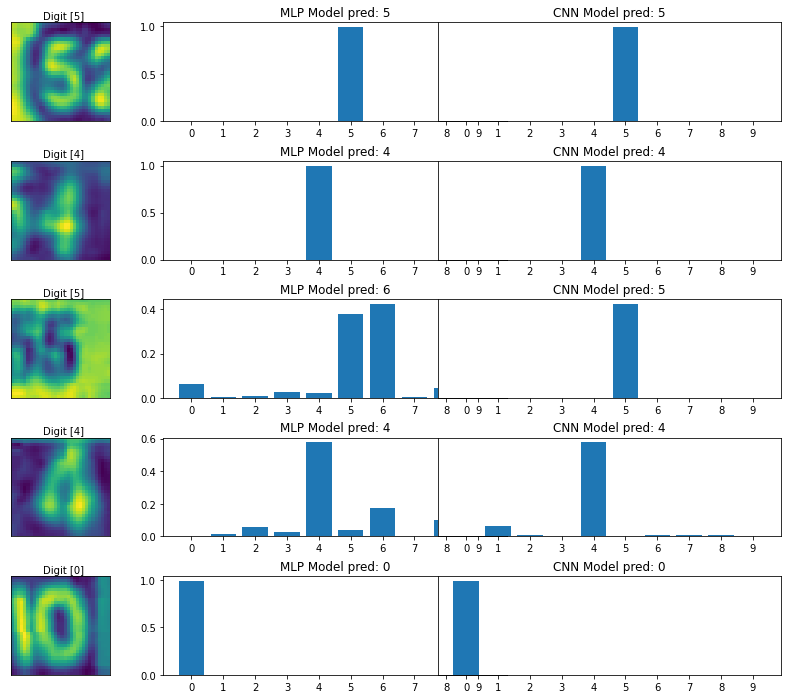

In [109]:
# TEST images
random_sample = np.random.choice(test_data.shape[0], 5)
print("Random sample for grayscale images: ", random_sample)

random_test_images = test_data[random_sample, ...]
random_test_labels = test_targets[random_sample, ...]

predictions_cnn = model_cnn.predict(random_test_images)
predictions_mlp = model_mlp.predict(random_test_images)

fig, axes = plt.subplots(5, 3, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, prediction2, image, label) in enumerate(zip(predictions_mlp, predictions_cnn, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"MLP Model pred: {np.argmax(prediction)}")

    axes[i, 2].bar(np.arange(len(prediction2)), prediction2)
    axes[i, 2].set_xticks(np.arange(len(prediction2)))
    axes[i, 2].set_yticks([])
    axes[i, 2].set_title(f"CNN Model pred: {np.argmax(prediction2)}")
    
plt.show()